In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
I = numpy.eye(2)
Kc = 1

def G(s):
    return numpy.matrix([[3/(3*s + 1), 1/(s + 1)],
                         [1/(s+1), 3/(4*s + 1)]])

def K(s):
    return Kc*I

def L(s):
    return G(s)*K(s)

def sigmas(G):
    u, s, v = numpy.linalg.svd(G)
    return s

def RGA(G):
    return numpy.asarray(G)*numpy.asarray(G.I).T
    
def RGAnum(G):
    return numpy.abs(RGA(G) - I).sum()

In [9]:
ws = numpy.logspace(-2, 2, 1000)

In [12]:
dets = []
OLsigmas = []
Tsigmas = []
RGAnums = []

for w in ws:
    s = 1j*w
    T = L(s)*(I + L(s)).I # Closed loop TF
    
    OLsigmas.append(sigmas(G(s)))
    Tsigmas.append(sigmas(T))
    RGAnums.append(RGAnum(G(s)))
    dets.append(numpy.linalg.det(L(s) + I))
dets = numpy.array(dets)

Multivariable Nyquist plot
--------------------------

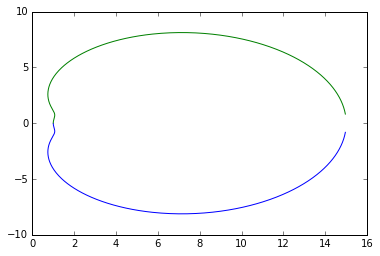

In [15]:
plt.plot(dets.real, dets.imag, dets.real, -dets.imag)

Singular values over frequency
------------------------------

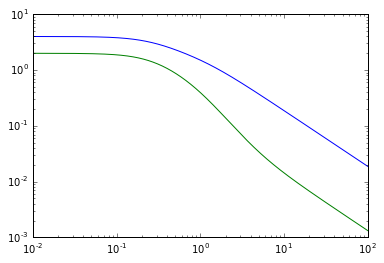

In [18]:
plt.loglog(ws, numpy.array(OLsigmas))

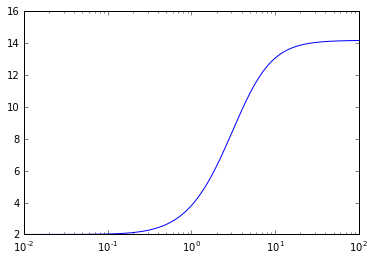

In [20]:
allsigmas = numpy.array(OLsigmas)
conditionnumber = allsigmas[:, 0]/allsigmas[:, 1]
plt.semilogx(ws, conditionnumber)

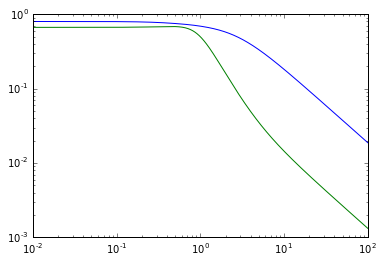

In [22]:
plt.loglog(ws, numpy.array(Tsigmas))

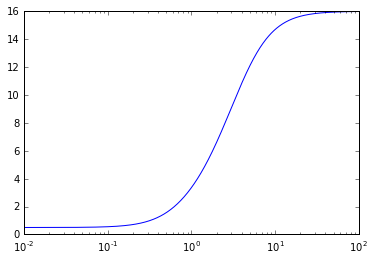

In [24]:
plt.semilogx(ws, RGAnums)